In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
import io
import os
from sklearn import metrics
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv(r"C:\Users\HP\Desktop\deep-learning-keras-tf-tutorial-master\11_chrun_prediction\customer_churn.csv",  na_values=["NAN", " "])
display(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
tenure_chun_no = df[df["Churn"]=="No"].tenure
tenure_chun_yes = df[df["Churn"]=="Yes"].tenure

Text(0, 0.5, 'Number of customer')

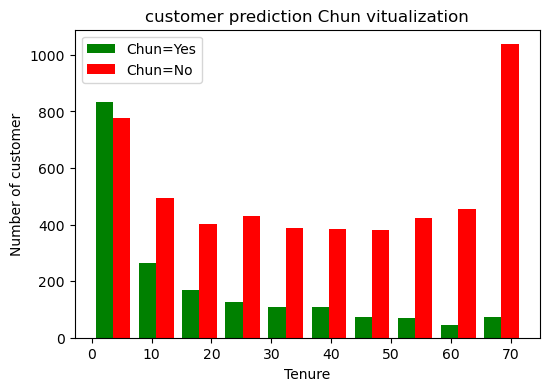

In [5]:
import matplotlib.pyplot as plt
# Create the histogram with two datasets
plt.figure(figsize=[6,4])
plt.hist([tenure_chun_yes, tenure_chun_no], bins=10, color=["green", "red"], label=['Chun=Yes', 'Chun=No'])

# Adding the legend to the plot
plt.legend()
plt.title('customer prediction Chun vitualization')
plt.xlabel('Tenure')
plt.ylabel('Number of customer')

Text(0, 0.5, 'Number of customer')

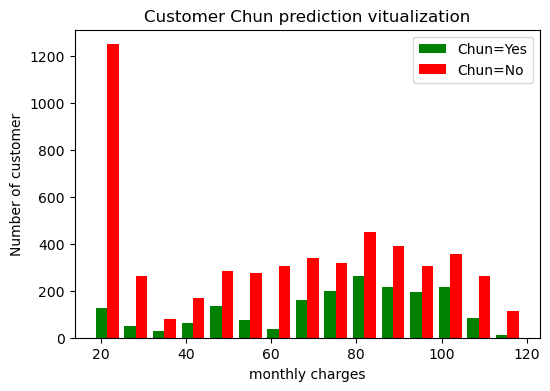

In [6]:
mc_chun_no = df[df["Churn"]=="No"].MonthlyCharges 
mc_chun_yes = df[df["Churn"]=="Yes"].MonthlyCharges 
plt.figure(figsize=[6,4])
plt.hist([mc_chun_yes, mc_chun_no], bins=15, color=["green", "red"], label=['Chun=Yes', 'Chun=No'])

# Adding the legend to the plot
plt.legend()
plt.title('Customer Chun prediction vitualization')
plt.xlabel('monthly charges')
plt.ylabel('Number of customer')

In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [8]:
def print_unique_column(df):
    for column in df:
        if df[column].dtypes == "object":
            print(f"{column} : {df[column].unique()}")

In [9]:
print_unique_column(df)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [10]:
df.replace('No internet service', "No", inplace=True)
df.replace('No phone service', "No", inplace=True)

In [11]:
print_unique_column(df)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [12]:
yes_no_columns = ["Partner","Dependents","PhoneService","OnlineBackup","MultipleLines",
                  "OnlineSecurity", "DeviceProtection", "TechSupport", "StreamingTV",
                  "StreamingMovies","PaperlessBilling","Churn"]

In [13]:
for col in yes_no_columns:
    df[col].replace({"Yes":1, "No": 0}, inplace=True)

In [14]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [15]:
df = pd.concat([df, pd.get_dummies(df["InternetService"], prefix="Internet", dtype=int)],axis=1)
df.drop("InternetService", axis=1, inplace=True)
df = pd.concat([df, pd.get_dummies(df["Contract"], prefix="Contract", dtype=int)],axis=1)
df.drop("Contract", axis=1, inplace=True)
df = pd.concat([df, pd.get_dummies(df["PaymentMethod"], prefix="Payment", dtype=int)],axis=1)
df.drop("PaymentMethod", axis=1, inplace=True)

In [16]:
df.replace({"Female":1,"Male":0},inplace=True)

In [17]:
display(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Internet_DSL,Internet_Fiber optic,Internet_No,Contract_Month-to-month,Contract_One year,Contract_Two year,Payment_Bank transfer (automatic),Payment_Credit card (automatic),Payment_Electronic check,Payment_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,1,0,...,1,0,0,0,1,0,0,0,0,1
7039,2234-XADUH,1,0,1,1,72,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
7040,4801-JZAZL,1,0,1,1,11,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
7041,8361-LTMKD,0,1,1,0,4,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [18]:
df.drop("customerID", axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             7043 non-null   int64  
 1   SeniorCitizen                      7043 non-null   int64  
 2   Partner                            7043 non-null   int64  
 3   Dependents                         7043 non-null   int64  
 4   tenure                             7043 non-null   int64  
 5   PhoneService                       7043 non-null   int64  
 6   MultipleLines                      7043 non-null   int64  
 7   OnlineSecurity                     7043 non-null   int64  
 8   OnlineBackup                       7043 non-null   int64  
 9   DeviceProtection                   7043 non-null   int64  
 10  TechSupport                        7043 non-null   int64  
 11  StreamingTV                        7043 non-null   int64

In [20]:
df["TotalCharges"]

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [21]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median()) 

In [22]:
#scaling the dataset
from sklearn.preprocessing import MinMaxScaler
col_to_scale= ["TotalCharges", "MonthlyCharges", "tenure"]
scaler = MinMaxScaler()
df[col_to_scale] = scaler.fit_transform(df[col_to_scale])

In [23]:
#creating feature and target
x = df.drop('Churn', axis=1)
y = df["Churn"]

In [24]:
#checking the shape
print(x.shape)
print(y.shape)

(7043, 26)
(7043,)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [34]:
def ANN(x_train, y_train, x_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(x_train, y_train, epochs=100)
    else:
        model.fit(x_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(x_test, y_test))
    
    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [35]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
166/166 [==============================] - 2s 5ms/step - loss: 0.5627 - accuracy: 0.6810
Epoch 2/100
166/166 [==============================] - 1s 4ms/step - loss: 0.4329 - accuracy: 0.7970
Epoch 3/100
166/166 [==============================] - 1s 5ms/step - loss: 0.4236 - accuracy: 0.8012
Epoch 4/100
166/166 [==============================] - 1s 5ms/step - loss: 0.4194 - accuracy: 0.8033
Epoch 5/100
166/166 [==============================] - 1s 5ms/step - loss: 0.4171 - accuracy: 0.8073
Epoch 6/100
166/166 [==============================] - 1s 5ms/step - loss: 0.4157 - accuracy: 0.8061
Epoch 7/100
166/166 [==============================] - 1s 5ms/step - loss: 0.4137 - accuracy: 0.8090
Epoch 8/100
166/166 [==============================] - 1s 5ms/step - loss: 0.4121 - accuracy: 0.8090
Epoch 9/100
166/166 [==============================] - 1s 5ms/step - loss: 0.4114 - accuracy: 0.8094
Epoch 10/100
166/166 [==============================] - 1s 5ms/step - loss: 0.4096 - accura

Text(45.722222222222214, 0.5, 'Truth')

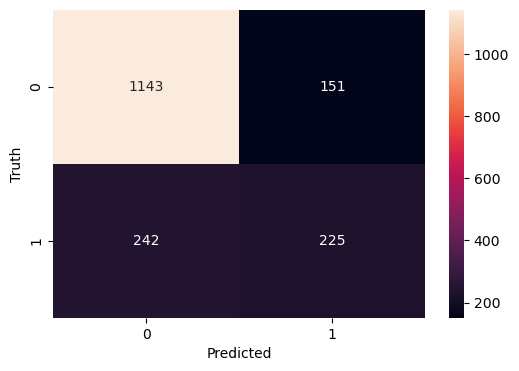

In [36]:
import seaborn as sn
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_preds)
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot= True, fmt= 'd' )
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [37]:
#total true value divided by total value
accuracy = round((1141+286)/(1141+141+193+286),2)
accuracy

0.81

In [38]:
#true actual zero prediction divided predicted plus error
zero_precision = round(1141/(1141+193),2)
zero_precision

0.86

In [39]:
#true actual one prediction divided predicted plus error
one_precision = round(286/(141+286),2)
one_precision

0.67

METHOD 1 UNDERSAMPLING 

In [40]:
#checking for churn dataset 
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [41]:
#balancing inbalance dataset using under
churn_zero, churn_one = df["Churn"].value_counts()
churn_zero, churn_one 

(5174, 1869)

In [42]:
df_class_zero = df[df["Churn"] == 0]
df_class_one = df[df["Churn"] == 1]


In [43]:
df_class_one.shape, df_class_zero.shape

((1869, 27), (5174, 27))

In [44]:
df_class_zero_under = df_class_zero.sample(churn_one)
df_class_zero_under.shape

(1869, 27)

In [45]:
df_test_under = pd.concat([df_class_one, df_class_zero_under], axis=0)
df_test_under.shape

(3738, 27)

In [46]:
x = df_test_under.drop("Churn", axis=1)
y = df_test_under["Churn"]

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [49]:
y_train.value_counts()

Churn
1    1402
0    1401
Name: count, dtype: int64

In [50]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
88/88 [==============================] - 2s 5ms/step - loss: 0.6187 - accuracy: 0.6625
Epoch 2/100
88/88 [==============================] - 0s 5ms/step - loss: 0.5240 - accuracy: 0.7467
Epoch 3/100
88/88 [==============================] - 0s 5ms/step - loss: 0.4994 - accuracy: 0.7592
Epoch 4/100
88/88 [==============================] - 0s 5ms/step - loss: 0.4930 - accuracy: 0.7642
Epoch 5/100
88/88 [==============================] - 0s 5ms/step - loss: 0.4876 - accuracy: 0.7624
Epoch 6/100
88/88 [==============================] - 0s 5ms/step - loss: 0.4840 - accuracy: 0.7635
Epoch 7/100
88/88 [==============================] - 0s 5ms/step - loss: 0.4815 - accuracy: 0.7674
Epoch 8/100
88/88 [==============================] - 0s 5ms/step - loss: 0.4803 - accuracy: 0.7702
Epoch 9/100
88/88 [==============================] - 0s 5ms/step - loss: 0.4788 - accuracy: 0.7752
Epoch 10/100
88/88 [==============================] - 0s 5ms/step - loss: 0.4759 - accuracy: 0.7735
Epoch 11/

EXAMPLE 2 OVERSAMPLING 

In [58]:
df_class_one_under = df_class_one.sample(churn_zero, replace=True)
df_class_one_under.shape

(5174, 27)

In [61]:
df_test_over = pd.concat([df_class_zero, df_class_one_under], axis=0)
df_test_over.Churn.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [62]:
x = df_test_over.drop("Churn", axis=1)
y = df_test_over["Churn"]

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [64]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
243/243 [==============================] - 3s 4ms/step - loss: 0.5516 - accuracy: 0.7266
Epoch 2/100
243/243 [==============================] - 1s 4ms/step - loss: 0.4946 - accuracy: 0.7585
Epoch 3/100
243/243 [==============================] - 1s 4ms/step - loss: 0.4880 - accuracy: 0.7602
Epoch 4/100
243/243 [==============================] - 1s 4ms/step - loss: 0.4835 - accuracy: 0.7627
Epoch 5/100
243/243 [==============================] - 1s 4ms/step - loss: 0.4807 - accuracy: 0.7627
Epoch 6/100
243/243 [==============================] - 1s 5ms/step - loss: 0.4781 - accuracy: 0.7627
Epoch 7/100
243/243 [==============================] - 1s 5ms/step - loss: 0.4757 - accuracy: 0.7668
Epoch 8/100
243/243 [==============================] - 1s 5ms/step - loss: 0.4737 - accuracy: 0.7668
Epoch 9/100
243/243 [==============================] - 1s 5ms/step - loss: 0.4706 - accuracy: 0.7705
Epoch 10/100
243/243 [==============================] - 1s 5ms/step - loss: 0.4687 - accura

In [65]:
x = df.drop('Churn', axis=1)
y = df["Churn"]

In [80]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x_sm, y_sm, test_size=0.25, random_state=42, stratify=y_sm)

In [82]:
y_preds = ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
243/243 [==============================] - 3s 5ms/step - loss: 0.5424 - accuracy: 0.7396
Epoch 2/100
243/243 [==============================] - 1s 5ms/step - loss: 0.4728 - accuracy: 0.7722
Epoch 3/100
243/243 [==============================] - 1s 5ms/step - loss: 0.4616 - accuracy: 0.7798
Epoch 4/100
243/243 [==============================] - 1s 4ms/step - loss: 0.4562 - accuracy: 0.7824
Epoch 5/100
243/243 [==============================] - 1s 4ms/step - loss: 0.4523 - accuracy: 0.7813
Epoch 6/100
243/243 [==============================] - 1s 5ms/step - loss: 0.4485 - accuracy: 0.7847
Epoch 7/100
243/243 [==============================] - 1s 5ms/step - loss: 0.4449 - accuracy: 0.7847
Epoch 8/100
243/243 [==============================] - 1s 5ms/step - loss: 0.4413 - accuracy: 0.7893
Epoch 9/100
243/243 [==============================] - 1s 5ms/step - loss: 0.4389 - accuracy: 0.7918
Epoch 10/100
243/243 [==============================] - 1s 5ms/step - loss: 0.4355 - accura